Srednia ocen ze wszystkich kursów wynosi: 4.442155555555556
W naszym dataset mamy 29758 ocen wyższych niż 4
W naszym dataset mamy 351 ocen wyższych niż 4 dla kursu The Python Course: OpenCV in Python
4.623404255319149
Kursy z zakresu 1 lipca 2020 i 31 grudnia 2020:                                         Course Name                 Timestamp  \
3065  The Python Course: Interactive Visualizations 2020-12-30 23:28:34+00:00   
3066             The Python Course: AI/ML in Python 2020-12-30 22:59:02+00:00   
3067             The Python Course: AI/ML in Python 2020-12-30 22:40:10+00:00   
3068             The Python Course: AI/ML in Python 2020-12-30 21:56:41+00:00   
3069             The Python Course: AI/ML in Python 2020-12-30 21:14:34+00:00   
...                                             ...                       ...   
9729             The Python Course: AI/ML in Python 2020-07-01 03:09:44+00:00   
9730             The Python Course: AI/ML in Python 2020-07-01 03:09:12+00:00   
9731 

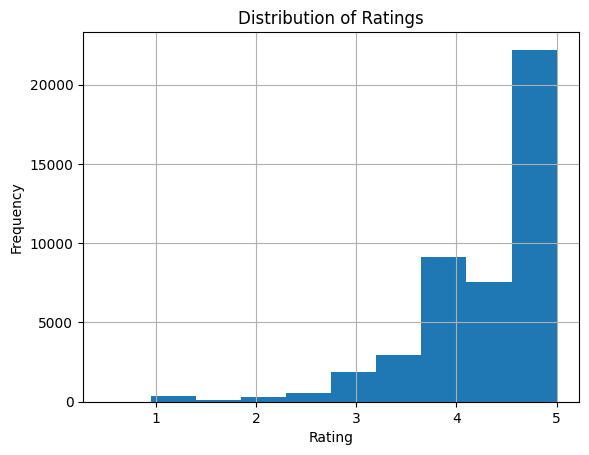

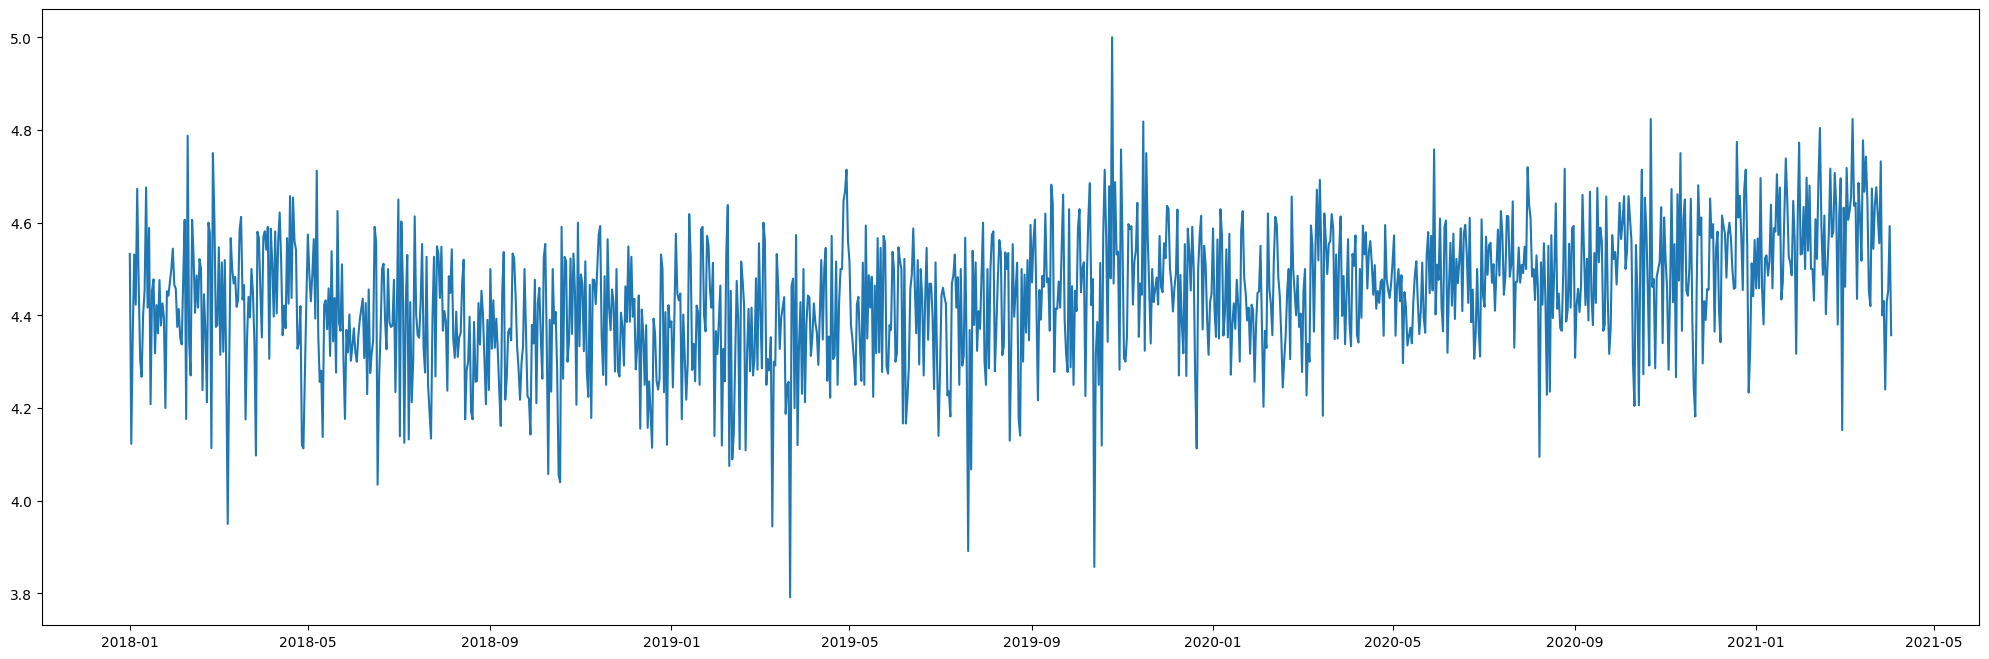

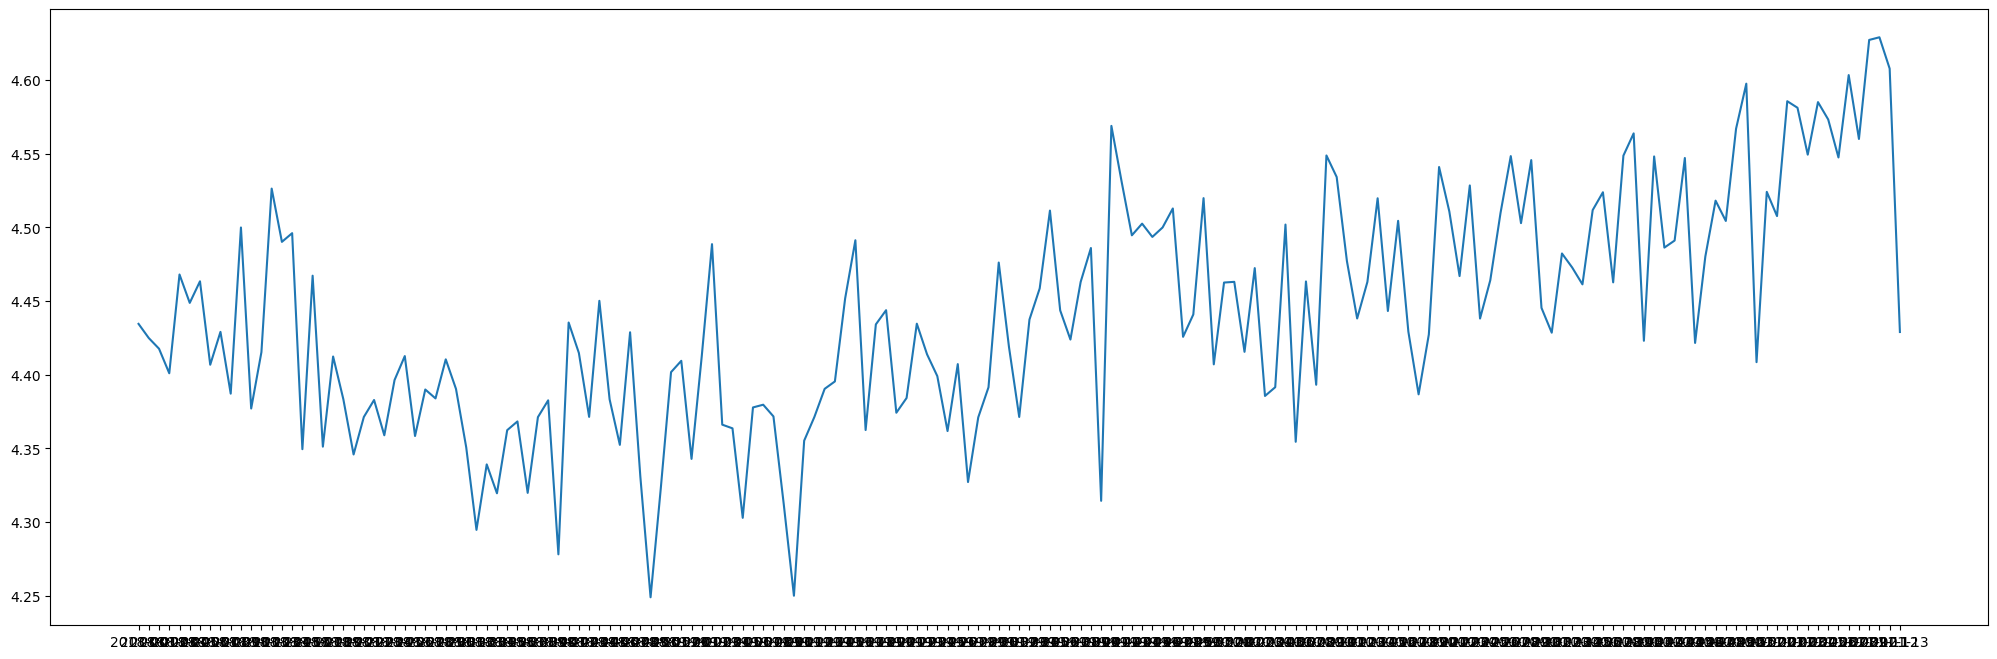

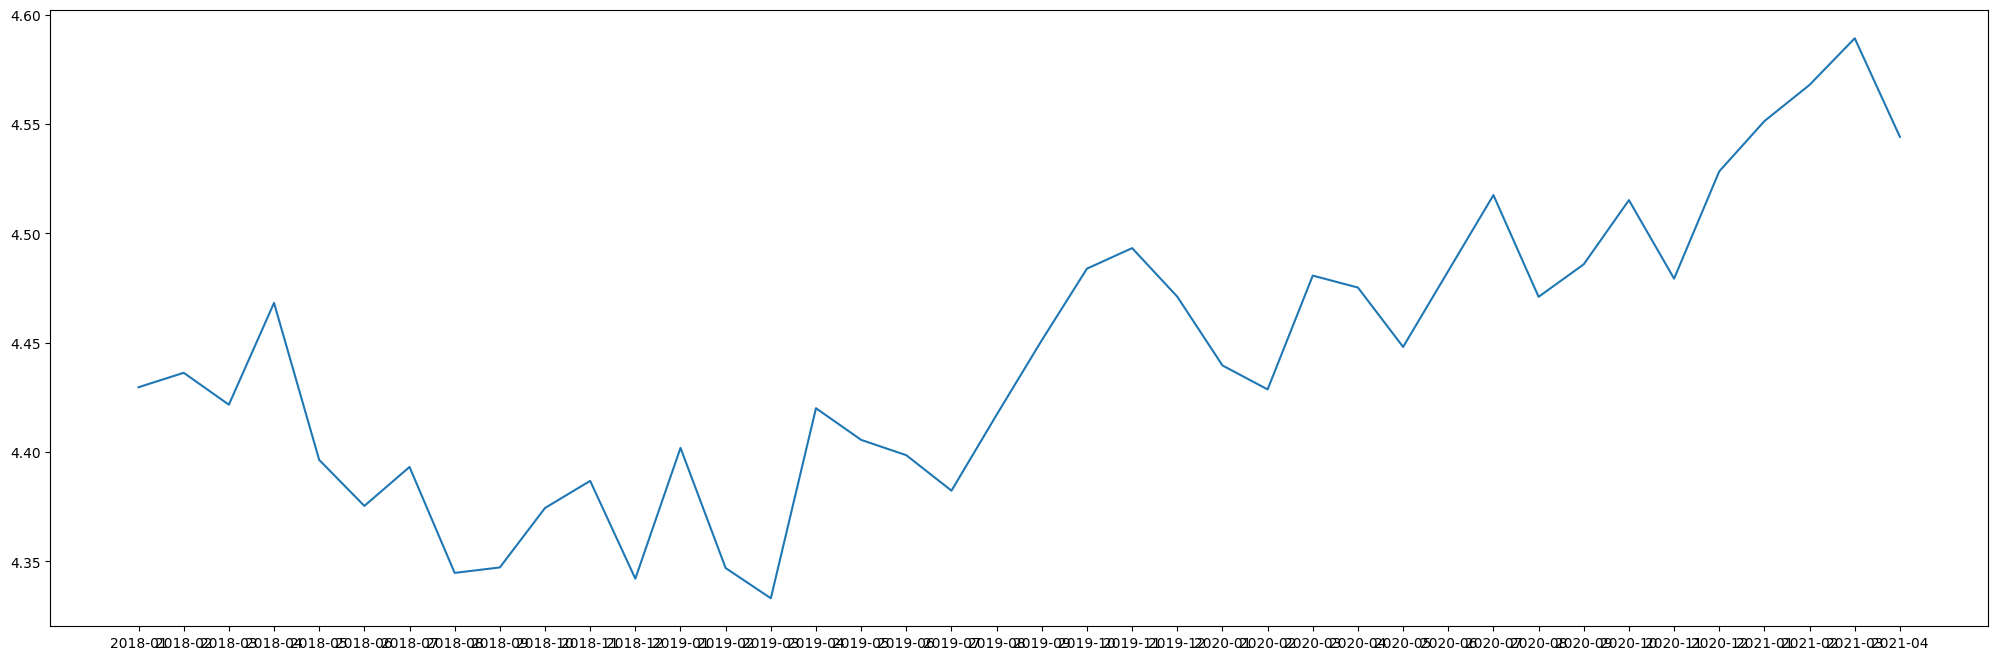

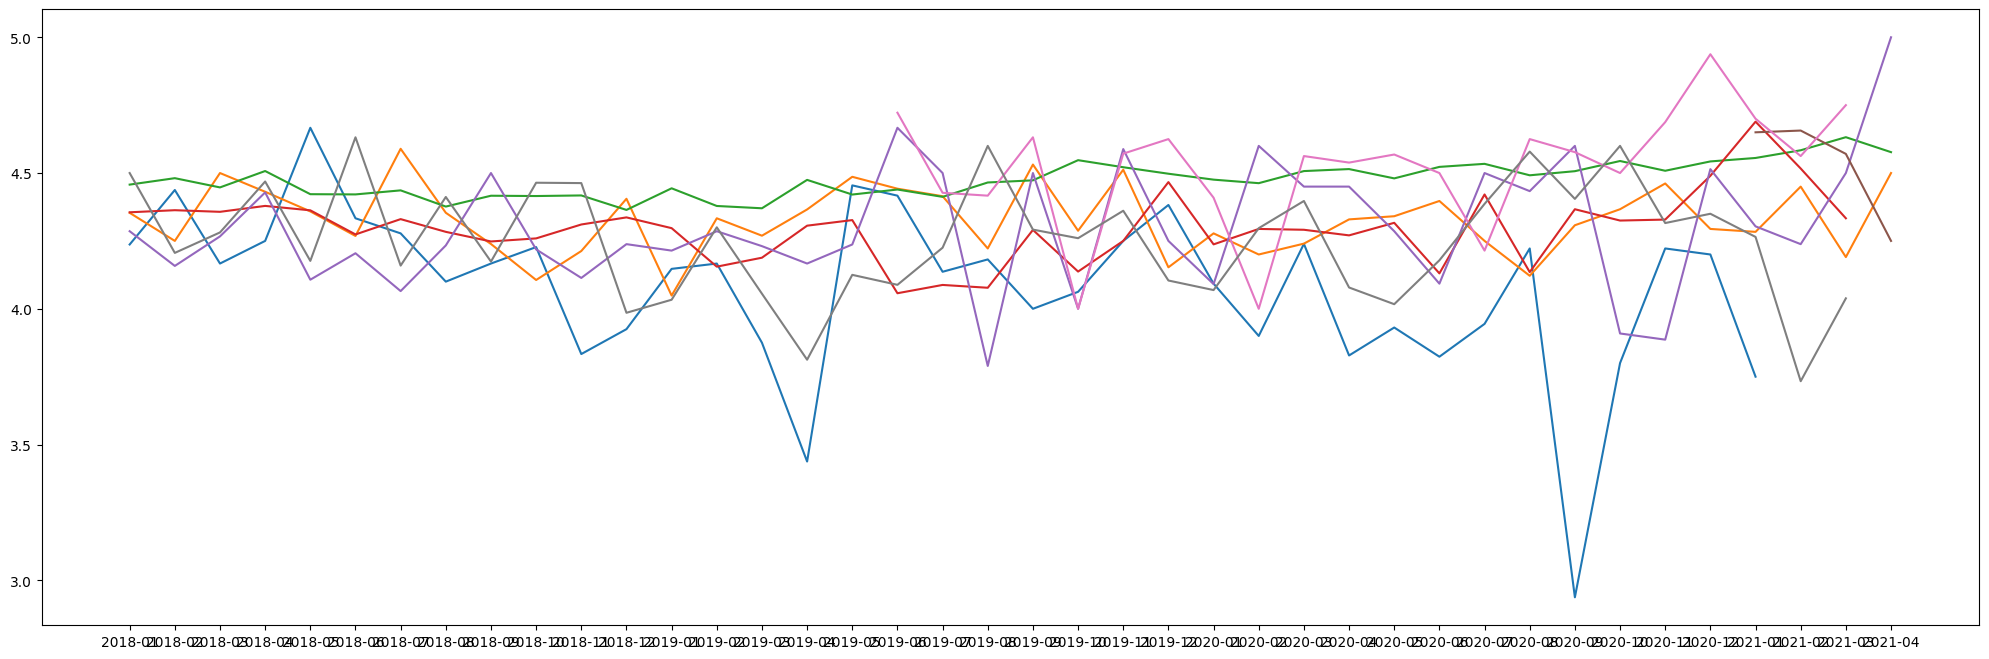

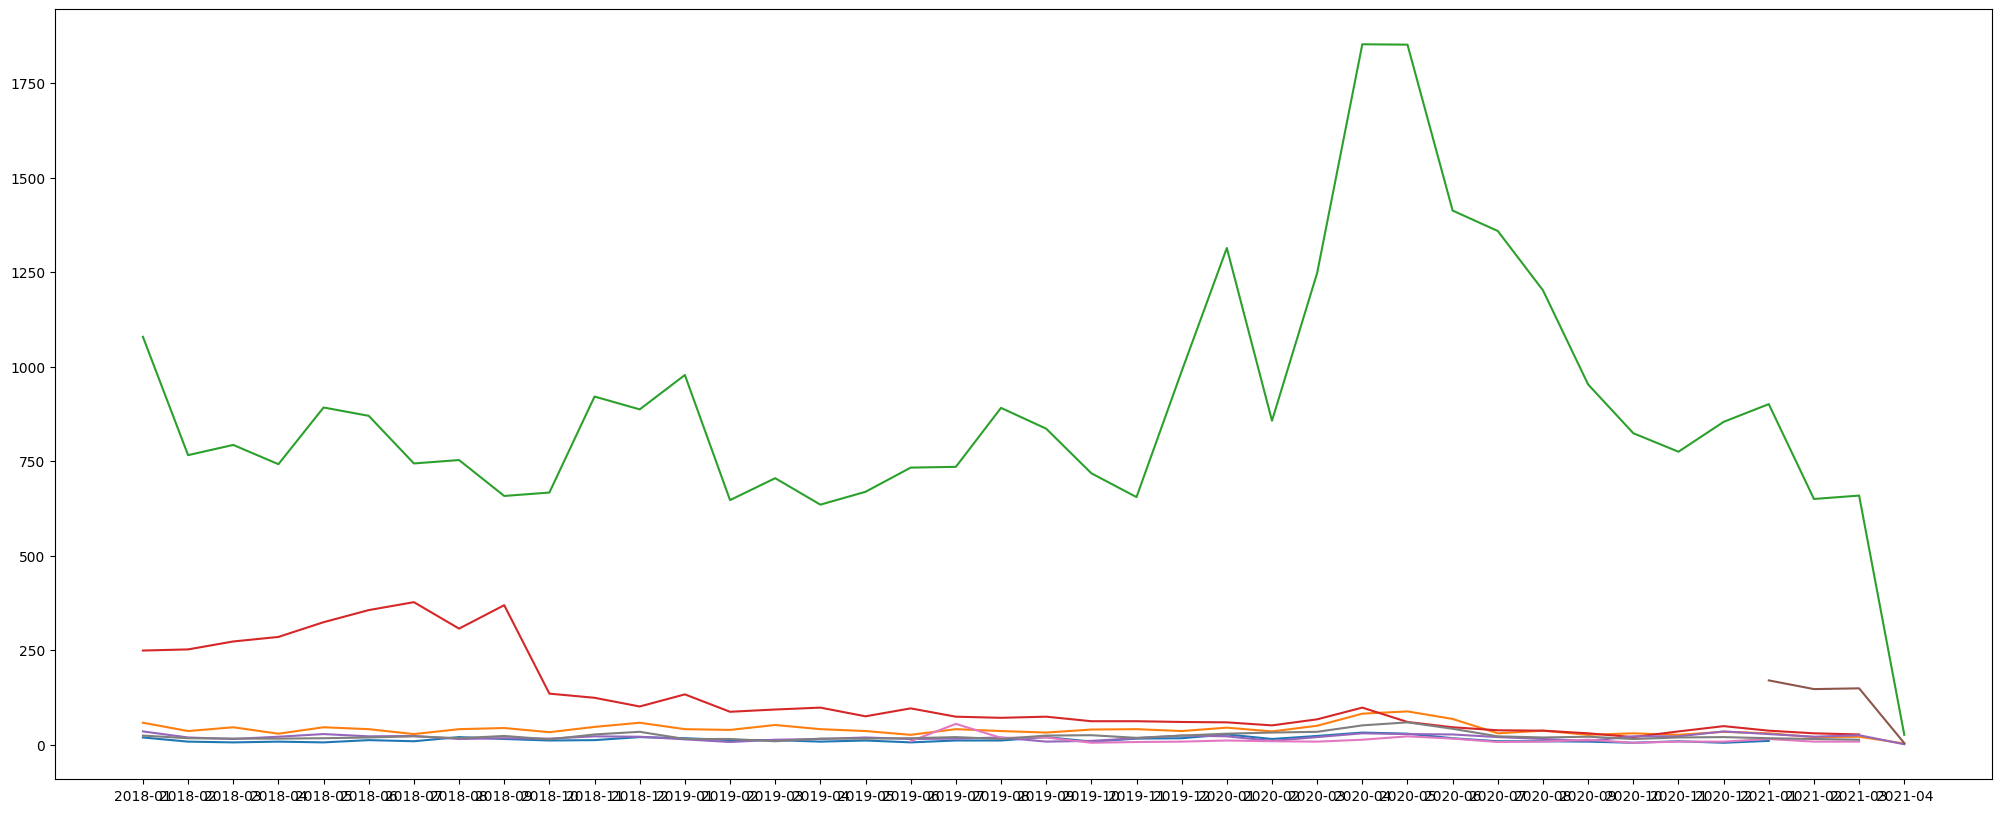

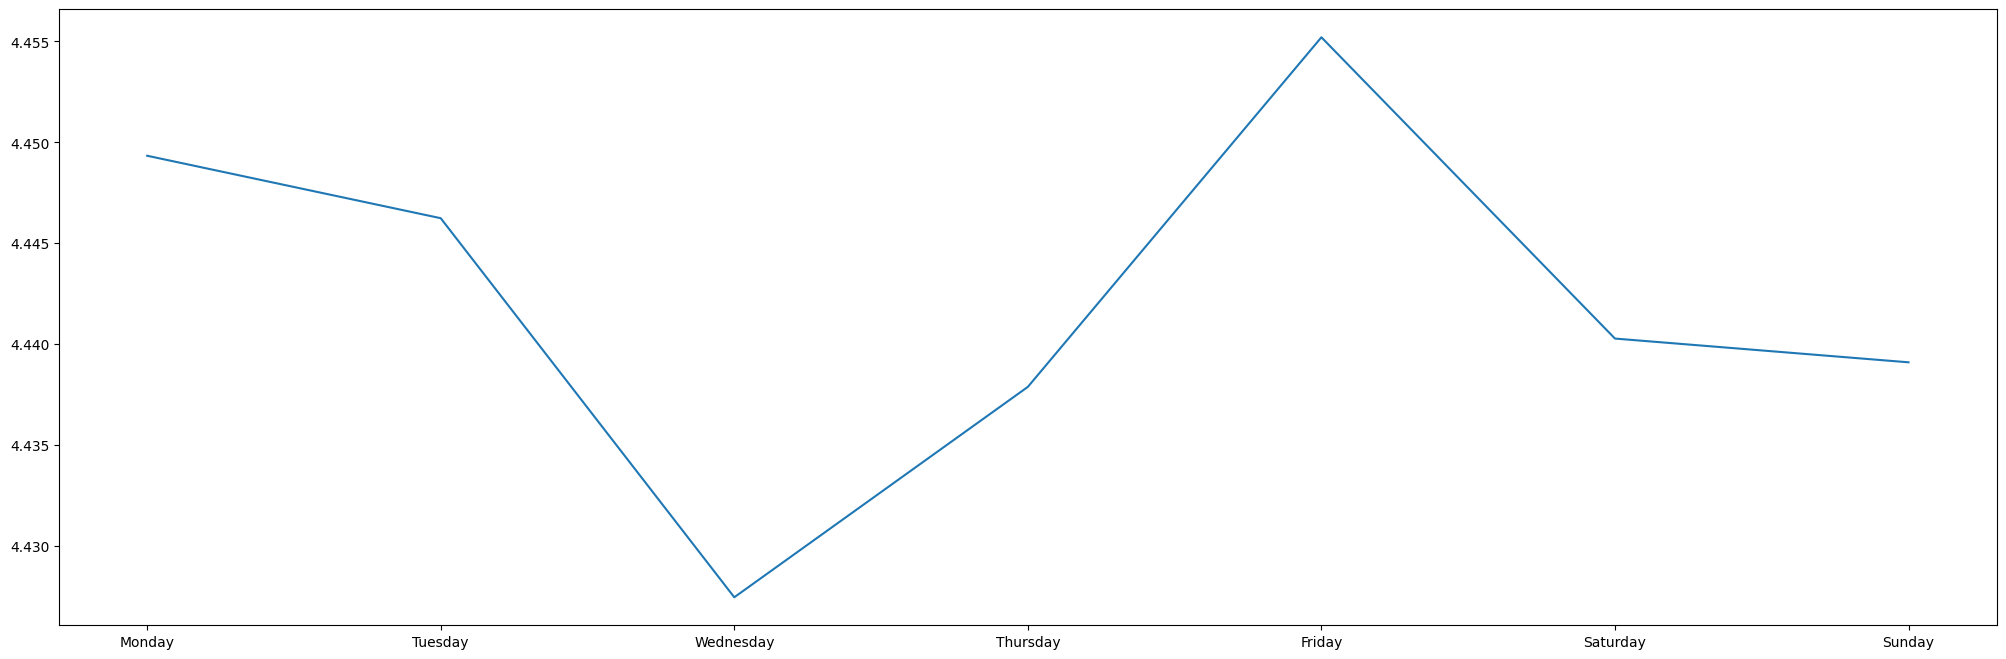

In [2]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pd.read_csv('reviews_courses.csv', parse_dates=['Timestamp'])
%matplotlib inline

print(f'Srednia ocen ze wszystkich kursów wynosi: {data['Rating'].mean()}')

unique_courses = data['Course Name'].unique()

# for course in unique_courses:
#     print(course)

no_of_rows = data[data['Rating'] > 4].shape[0]

print(f'W naszym dataset mamy {no_of_rows} ocen wyższych niż 4')

no_of_rows2 = data[(data['Rating'] > 4) & (data['Course Name'] == 'The Python Course: OpenCV in Python')].shape[0]
print(f'W naszym dataset mamy {no_of_rows2} ocen wyższych niż 4 dla kursu The Python Course: OpenCV in Python')

# print(data[data['Rating'] > 4])

average_value = data[data['Course Name']== 'The Python Course: OpenCV in Python']['Rating'].mean()
print(average_value)

filtered_data = data[(data['Timestamp'] >= datetime(2020,7,1, tzinfo=utc)) & (data['Timestamp'] <= datetime(2020,12,31, tzinfo=utc))]

print(f'Kursy z zakresu 1 lipca 2020 i 31 grudnia 2020: {filtered_data}')

filtered_data2 = data[(data['Timestamp'] >= datetime(2020,7,1, tzinfo=utc)) & (data['Timestamp'] <= datetime(2020,12,31, tzinfo=utc)) &
(data['Course Name'] == 'The Python Course: From Beginner to Expert')]

print(f'Średnia ocen z kursów między 1 lipca 2020 i 31 grudnia 2020 wynosi: {filtered_data2['Rating'].mean()}')

no_comment_rows = data[data['Comment'].isnull()].shape[0]

print(f'Liczba wierszy bez komentarzy wynosi: {no_comment_rows}')

rows_with_accent = data[data['Comment'].notnull() & data['Comment'].str.contains('accent')].shape[0]

print(f'Liczba wierszy z komentarzami zawierającymi słowo "accent" wynosi: {rows_with_accent}')

data['Day'] = data['Timestamp'].dt.date

# print(data.head)
day_average = data.groupby(['Day']).mean(numeric_only=True)
print(day_average.head())

data['Rating'].hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

plt.figure(figsize=(25,8))
plt.plot(day_average.index, day_average['Rating'])

data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')

week_average = data.groupby(['Week']).mean(numeric_only=True)

plt.figure(figsize=(25,8))
plt.plot(week_average.index, week_average['Rating'])

data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')

month_average = data.groupby(['Month']).mean(numeric_only=True)
plt.figure(figsize=(25,8))
plt.plot(month_average.index, month_average['Rating'])

# print(month_average.head())

month_course_average = data.groupby(['Month', 'Course Name']).mean(numeric_only=True).unstack()

# print(month_course_average.head())

plt.figure(figsize=(25,8))
plt.plot(month_course_average.index, month_course_average['Rating'])

month_course_average2 = data.groupby(['Month', 'Course Name']).count().unstack()

# print(month_course_average2.head())

plt.figure(figsize=(25,10))
plt.plot(month_course_average2.index, month_course_average2['Rating'])

# print(dayofweek_average)

data['DayOfWeek'] = data['Timestamp'].dt.day_name()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DayOfWeek'] = pd.Categorical(data['Timestamp'].dt.dayofweek.map(dict(enumerate(day_names))), categories=day_names, ordered=True)
dayofweek_average = data.groupby('DayOfWeek', observed=True).mean(numeric_only=True)

plt.figure(figsize=(25,8))
plt.plot(dayofweek_average.index, dayofweek_average['Rating'])




